<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/heat_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python

import numpy as np
import sympy as sp

# Define the variables and parameters
z, a, t, b_c, b_sc, t_c, b_l, k, N = sp.symbols('z a t b_c b_sc t_c b_l k N')
Tm = sp.Symbol('Tm')
tau = a**2 / (sp.pi**2 * k)

# Define the equation for T/Tm
T_over_Tm = 1 - z/a
for n in range(1, N+1):
    Cn = (2 * (-1)**(n+1) / (n**2 * sp.pi**2)) * ((b_c - b_sc) * sp.sin(n * sp.pi * t_c / (a * b_c)) + b_sc * sp.sin(n * sp.pi / b_l))
    T_over_Tm += Cn * sp.sin(n * sp.pi * z / a) * sp.exp(-n**2 * t / tau)

# Substitute values for the parameters
values = {a: 1.0, z: 0.5, t: 0.1, b_c: 2.0, b_sc: 1.0, t_c: 0.2, b_l: 0.5, k: 0.1, N: 10}

# Evaluate T/Tm at the given values
result = T_over_Tm.subs(values)

# Print the result
print(result)

TypeError: 'Add' object cannot be interpreted as an integer

In [ ]:
# Python

import numpy as np
import sympy as sp

# Define the variables and parameters
z, a, t, b_c, b_sc, t_c, b_l, k = sp.symbols('z a t b_c b_sc t_c b_l k')
Tm = sp.Symbol('Tm')
N = 10  # Number of terms in the sum
tau = a**2 / (sp.pi**2 * k)

# Define the equation for T/Tm
T_over_Tm = 1 - z/a
for n in range(1, N+1):
    Cn = (2 * (-1)**(n+1) / (n**2 * sp.pi**2)) * ((b_c - b_sc) * sp.sin(n * sp.pi * t_c / (a * b_c)) + b_sc * sp.sin(n * sp.pi / b_l))
    T_over_Tm += Cn * sp.sin(n * sp.pi * z / a) * sp.exp(-n**2 * t / tau)

# Substitute values for the parameters
values = {a: 1.0, z: 0.5, t: 0.1, b_c: 2.0, b_sc: 1.0, t_c: 0.2, b_l: 0.5, k: 0.1}

# Evaluate T/Tm at the given values
result = T_over_Tm.subs(values)

# Print the result
print(result)

-0.222222222222222*exp(-0.09*pi**2)*sin(0.3*pi)/pi**2 - 0.0408163265306122*exp(-0.49*pi**2)*sin(0.7*pi)/pi**2 + 0.0246913580246914*exp(-0.81*pi**2)*sin(0.9*pi)/pi**2 + 0.08*exp(-0.25*pi**2)/pi**2 + 2.0*exp(-0.01*pi**2)*sin(0.1*pi)/pi**2 + 0.5


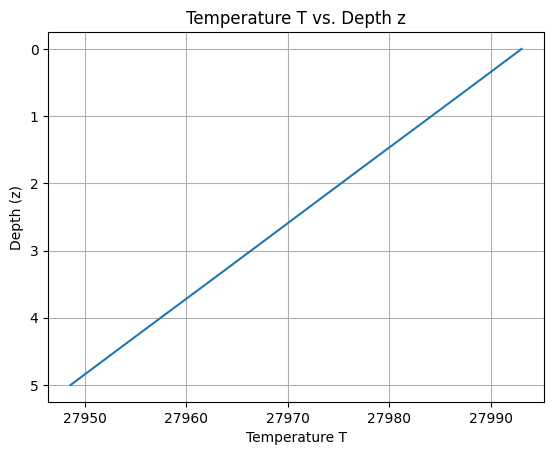

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

z = np.linspace(0, 5, 10)

# Define the variables and parameters
a, t, b_c, b_l, t_c = 125, 0, 2.5, 1.0, 35
b_sc = 1.0
tau = 62.8
T0 = 20

Tm = 1333
N = 100  # Number of terms in the sum

# Define the equation for T/Tm with z as a variable
T_over_Tm = T0 + 1 - z/a
for n in range(1, N+1):
    Cn = (2 * (-1)**(n+1) / (n**2 * np.pi**2)) * ((b_c - b_sc) * np.sin(n * np.pi * t_c / (a * b_c)) + b_sc * np.sin(n * np.pi / b_l))
    T_over_Tm += Cn * np.sin(n * np.pi * z / a) * np.exp(-n**2 * t / tau)

# Plotting
plt.figure()
plt.plot(T_over_Tm * Tm, z)  # Corrected variable names for plotting
plt.ylabel('Depth (z)')
plt.xlabel('Temperature T')
plt.title('Temperature T vs. Depth z')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

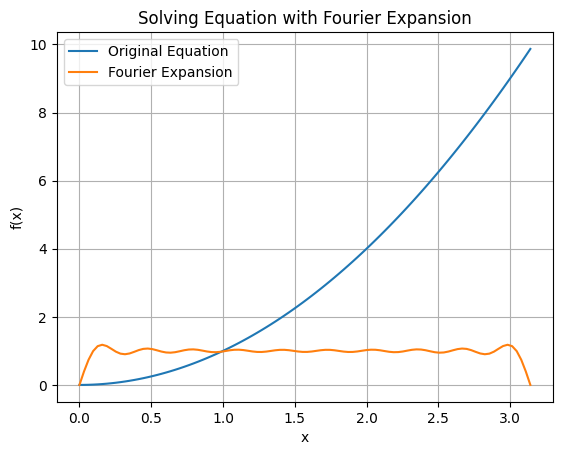

In [ ]:
# Python

import numpy as np
import matplotlib.pyplot as plt

# Define the equation you want to solve
def equation_to_solve(x):
    return x**2  # Example equation, replace with your own

# Define the Fourier expansion function
def fourier_expansion(x, n_terms):
    result = 0
    for n in range(1, n_terms+1):
        result += (4 / (np.pi * (2*n - 1))) * np.sin((2*n - 1) * x)
    return result

# Define the range of x values
x_values = np.linspace(0, np.pi, 100)  # Adjust range as needed

# Calculate the Fourier expansion for the equation
n_terms = 10  # Number of terms in the Fourier series
fourier_values = [fourier_expansion(x, n_terms) for x in x_values]

# Plot the original equation and its Fourier expansion
plt.figure()
plt.plot(x_values, [equation_to_solve(x) for x in x_values], label='Original Equation')
plt.plot(x_values, fourier_values, label='Fourier Expansion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Solving Equation with Fourier Expansion')
plt.grid(True)
plt.show()

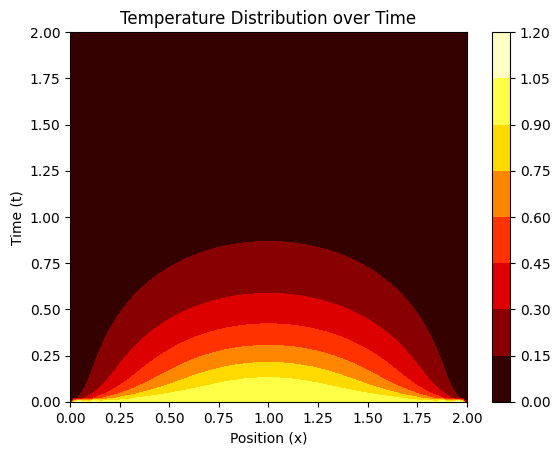

In [ ]:
# Python

import numpy as np
import matplotlib.pyplot as plt

# Define the 1D heat flow equation and boundary conditions
# Example: dT/dt = k * d^2T/dx^2
# Boundary conditions: T(0, t) = 0, T(L, t) = 5
# Initial condition: T(x, 0) = f(x)

# Define the Fourier series expansion function
def fourier_series_coefficients(n, L):
    if n % 2 == 0:
        return 0
    else:
        return (2 / (n * np.pi)) * (1 - np.cos(n * np.pi))

# Define the temperature distribution function using Fourier series
def temperature_distribution(x, t, L, k, N):
    T = 0
    for n in range(1, N+1):
        coefficient = fourier_series_coefficients(n, L)
        T += coefficient * np.sin(n * np.pi * x / L) * np.exp(-k * (n * np.pi / L)**2 * t)
    return T

# Define parameters
L = 2  # Length of the rod
k = 1  # Thermal conductivity
N = 50  # Number of terms in the Fourier series

# Calculate temperature distribution at different x and t values
x_values = np.linspace(0, L, 100)
t_values = np.linspace(0, 2, 100)
X, T = np.meshgrid(x_values, t_values)
temperature_values = temperature_distribution(X, T, L, k, N)

# Plot the temperature distribution
plt.figure()
plt.contourf(X, T, temperature_values, cmap='hot')
plt.colorbar()
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Temperature Distribution over Time')
plt.show()

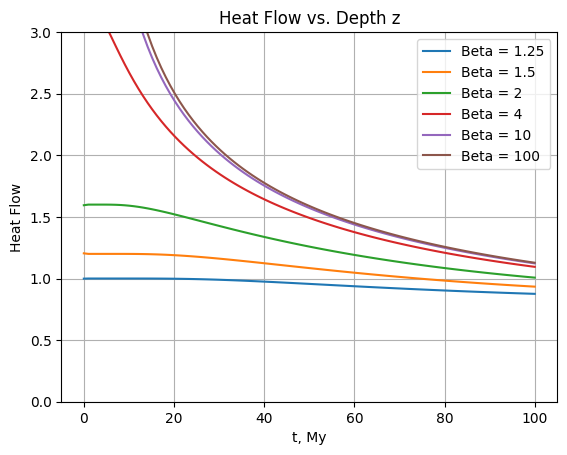

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def heat_flux(beta, t):

    # Define the variables and parameters
    a = 125
    tau = 62.8
    T1 = 1333
    N = 100  # Number of terms in the sum

    # Define the equation for T/Tm with z as a variable
    T_sum = 0
    for n in range(1, N+1):
        Cn = beta / (n * np.pi) * np.sin(n * np.pi / beta) * np.exp(-n**2 * t / tau)
        T_sum += Cn
    T_over_Tm = 0.8 * (1 + 2 * T_sum)

    return T_over_Tm

beta_list = [1.25, 1.5, 2, 4, 10, 100]
t = np.linspace(0, 100, 100)

plt.figure()
for beta in beta_list:
    plt.plot(t, heat_flux(beta, t), label=f'Beta = {beta}')

plt.xlabel('t, My')
plt.ylabel('Heat Flow')
plt.title('Heat Flow vs. Depth z')
plt.grid(True)
plt.legend()
plt.ylim(0, 3)
plt.show()

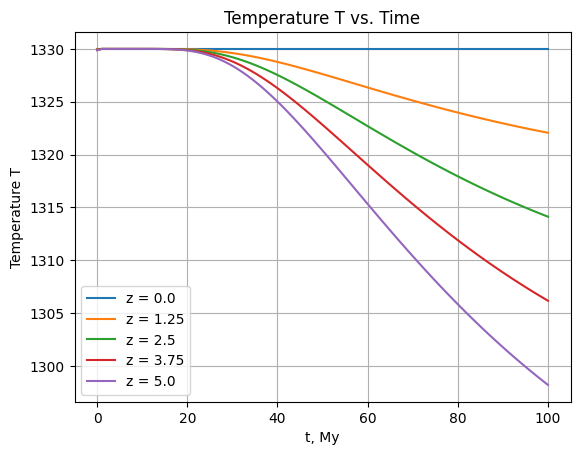

In [39]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def temperature(z, t):

    # Define the variables and parameters

    a = 125
    tau = 62.8
    T1 = 1330
    N = 200  # Number of terms in the sum
    beta = 2

    # Define the equation for T/Tm with z as a variable
    T_sum = 0

    for n in range(1, N+1):
        Cn = ((-1)**(n+1))/n * (beta / (n * np.pi) * (n * np.pi / beta)) * np.exp(-n**2 * t / tau) * np.sin(n * np.pi* z/a)
        T_sum += Cn
    T_over_Tm = (1 - z/a + 2/np.pi* T_sum) * T1



    # Cn = 2/np.pi* beta/np.pi * np.sin(np.pi / beta) * np.exp(-t/tau) * np.sin(np.pi * z/a)
    # T_over_Tm = (1 - z/a + Cn) * T1


    return T_over_Tm

# beta_list = [1.25, 1.5, 2, 4, 10, 100]
z_list = np.linspace(0, 5, 5)
t = np.linspace(0, 100, 100)

plt.figure()
for z in z_list:
    plt.plot(t, temperature(z, t), label=f'z = {z}')

plt.xlabel('t, My')
plt.ylabel('Temperature T')
plt.title('Temperature T vs. Time')
plt.grid(True)
plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis
# plt.ylim(0, 3)
plt.show()

SEDIMENTARY BASIN FORMATION WITH FINITE EXTENSION RATES, steady solution(14)

In [ ]:
T0 (z) = (-T1 * erf(z/a - 1)* np.sqrt(G/2))/ (erf(np.sqrt(G/2)))

<ipython-input-46-af338cc9eb1b>:61: RuntimeWarning: invalid value encountered in divide
  return (-T1 * erf(z/a - 1) * np.sqrt(G/2)) / (erf(np.sqrt(G/2)))


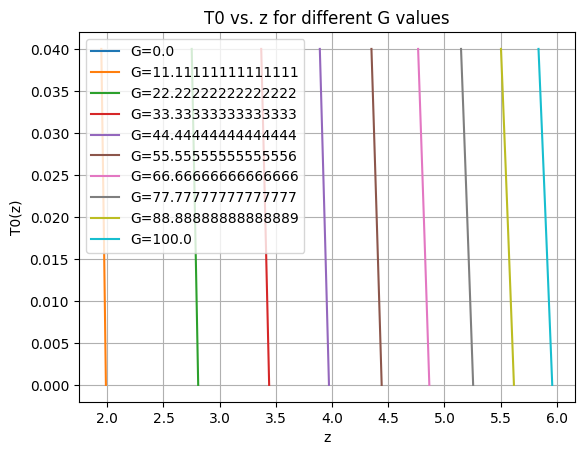

In [46]:
# steady solution:import numpy as np
# import sympy as sp
# import matplotlib.pyplot as plt

# def temperature(z, t):

#     # Define the variables and parameters

#     a = 125
#     tau = 62.8
#     T1 = 1330
#     N = 200  # Number of terms in the sum
#     beta = 2

#     # Define the equation for T/Tm with z as a variable
#     T_sum = 0

#     for n in range(1, N+1):
#         Cn = ((-1)**(n+1))/n * (beta / (n * np.pi) * (n * np.pi / beta)) * np.exp(-n**2 * t / tau) * np.sin(n * np.pi* z/a)
#         T_sum += Cn
#     T_over_Tm = (1 - z/a + 2/np.pi* T_sum) * T1



#     # Cn = 2/np.pi* beta/np.pi * np.sin(np.pi / beta) * np.exp(-t/tau) * np.sin(np.pi * z/a)
#     # T_over_Tm = (1 - z/a + Cn) * T1


#     return T_over_Tm

# # beta_list = [1.25, 1.5, 2, 4, 10, 100]
# z_list = np.linspace(0, 5, 5)
# t = np.linspace(0, 100, 100)

# plt.figure()
# for z in z_list:
#     plt.plot(t, temperature(z, t), label=f'z = {z}')

# plt.xlabel('t, My')
# plt.ylabel('Temperature T')
# plt.title('Temperature T vs. Time')
# plt.grid(True)
# plt.legend()
# # plt.gca().invert_yaxis()  # Invert the y-axis
# # plt.ylim(0, 3)
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

a = 125
tau = 62.8
T1 = 1330
N = 200  # Number of terms in the sum
beta = 2

# Define the function T0(z)
def T0(z, T1, a, G):
    return (-T1 * erf(z/a - 1) * np.sqrt(G/2)) / (erf(np.sqrt(G/2)))

# Create an array of values for G ranging from 0 to 100

# Define z values
beta = 2
G = 50
dt_values = []  # Adjust the number of points as needed for smoother visualization
z = np.linspace(0, 5, 100)  # Adjust the range and number of points as needed

# Plot T0(z) for different G values
for G in G_values:
    T_values = T0(z, T1, a, G)  # Assuming T1=1 and a=1 for simplicity
    plt.plot(T_values/T1, z/a, label=f'G={G}')

plt.xlabel('z')
plt.ylabel('T0(z)')
plt.title('T0 vs. z for different G values')
plt.legend()
plt.grid(True)
plt.show()

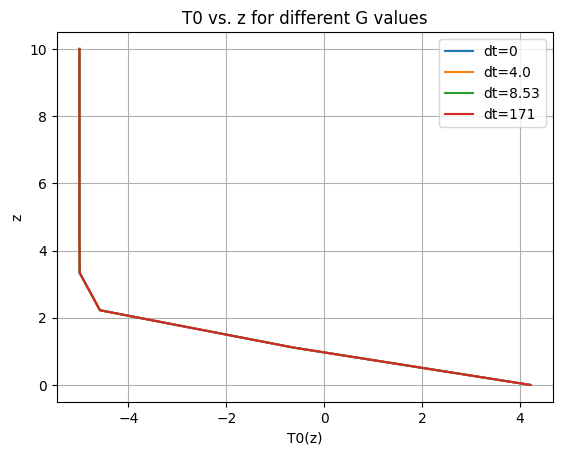

In [68]:
# steady solution:import numpy as np
# import sympy as sp
# import matplotlib.pyplot as plt

# def temperature(z, t):

#     # Define the variables and parameters

#     a = 125
#     tau = 62.8
#     T1 = 1330
#     N = 200  # Number of terms in the sum
#     beta = 2

#     # Define the equation for T/Tm with z as a variable
#     T_sum = 0

#     for n in range(1, N+1):
#         Cn = ((-1)**(n+1))/n * (beta / (n * np.pi) * (n * np.pi / beta)) * np.exp(-n**2 * t / tau) * np.sin(n * np.pi* z/a)
#         T_sum += Cn
#     T_over_Tm = (1 - z/a + 2/np.pi* T_sum) * T1



#     # Cn = 2/np.pi* beta/np.pi * np.sin(np.pi / beta) * np.exp(-t/tau) * np.sin(np.pi * z/a)
#     # T_over_Tm = (1 - z/a + Cn) * T1


#     return T_over_Tm

# # beta_list = [1.25, 1.5, 2, 4, 10, 100]
# z_list = np.linspace(0, 5, 5)
# t = np.linspace(0, 100, 100)

# plt.figure()
# for z in z_list:
#     plt.plot(t, temperature(z, t), label=f'z = {z}')

# plt.xlabel('t, My')
# plt.ylabel('Temperature T')
# plt.title('Temperature T vs. Time')
# plt.grid(True)
# plt.legend()
# # plt.gca().invert_yaxis()  # Invert the y-axis
# # plt.ylim(0, 3)
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

a = 125
tau = 62.8
T1 = 1330


# Define the function T0(z)
def T0(z, T1, a, G):
    return ((-T1 * erf(z/a - 1) * np.sqrt(G/2))) / (erf(np.sqrt(G/2)))

# Create an array of values for G ranging from 0 to 100

# Define z values
beta = 2
G = 50
# dt_values = [np.log(beta)/(G*(1/616))]  # Adjust the number of points as needed for smoother visualization
dt_values = [0, 4.0, 8.53, 171]
z_fix = np.linspace(0, 10, 10)
z = z_fix * a  # Adjust the range and number of points as needed

# Plot T0(z) for different G values
for t in dt_values:
    T_values = T0(z, T1, a, G)  # Assuming T1=1 and a=1 for simplicity
    plt.plot(T_values/T1, z/a, label=f'dt={t}')

plt.xlabel('T0(z)')
# plt.xlim(0, 10)
plt.ylabel('z')
plt.title('T0 vs. z for different G values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
T(z, t) = T1*(1- z/a) + T1 * sum(bn * exp(n^2*pi*2^2*(t - dt)*k/a^2)*sin(n*np.pi*z/a))

bn = 2/(a*T1) * integral(a, 0) [T(z, dt) + T1(z/a - 1)*sin(n*np.pi*z/a)dz]

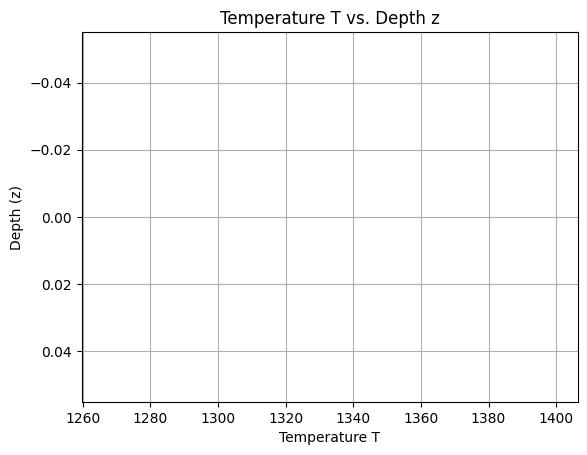

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

z = np.linspace(0, 5, 10)

# Define the variables and parameters
beta = 1.2
tau = 62.8
Tm = 1333
N = 100  # Number of terms in the sum
t = 10
T0 =0
a =125


# Define the equation for T/Tm with z as a variable
T_over_Tm = T0 + 1 - z/a
T_sum = 0
for n in range(1, N+1):
    Cn = ((-1)**(n+1) / n) * (beta/(n*np.pi) * np.sin((n * np.pi)/beta)) * np.sin((n * np.pi * z) / a) * np.exp((-n**2 * t) / tau)
    T_sum  += Cn

T_over_Tm += 2/np.pi*T_sum

# Plotting
plt.figure()
plt.plot(T_over_Tm*Tm, z)  # Corrected variable names for plotting
plt.ylabel('Depth (z)')
plt.xlabel('Temperature T')
plt.title('Temperature T vs. Depth z')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

In [ ]:
T(z, t) = T1*(1- z/a) + T1 * sum(bn * exp(n^2*pi*2^2*(t - dt)*k/a^2)*sin(n*np.pi*z/a))

bn = 2/(a*T1) * integral(a, 0) [T(z, dt) + T1(z/a - 1)*sin(n*np.pi*z/a)dz]

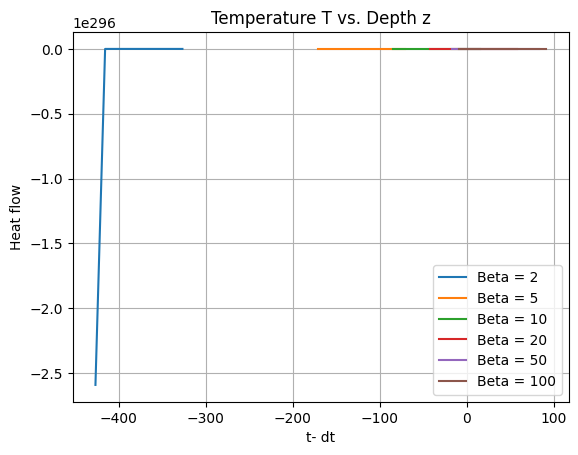

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def heat_flux(G, t):
    # Define the variables and parameters
    a = 125
    tau = 62.8
    T1 = 1333
    N = 10  # Number of terms in the sum
    beta = 4

    # Define the equation for T/Tm with z as a variable
    T_sum = 0
    for n in range(1, N+1):
        bn = 2/np.pi * (-1)**(n+1)/n * beta / (n * np.pi) * np.sin(n * np.pi / beta)
        Cn = n * bn  * np.exp(-n**2 * np.pi**2 * t * (1/616))
        T_sum += Cn
    T_over_Tm = 0.8 * (1 + np.pi * T_sum)

    return T_over_Tm

G_list = [2, 5, 10, 20, 50, 100]

t_list = np.linspace(0, 100, 10)
for G in G_list:
    t = t_list - np.log(beta) / G * 616
    plt.plot(t, heat_flux(G, t), label=f'Beta = {G}')

plt.xlabel('t- dt')
plt.ylabel('Heat flow')
# plt.xlim(0, 200)
plt.title('Temperature T vs. Depth z')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
np.log(2)/2*616

213.48933161246316